**Solutions to Selected Problems**

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [38]:
# Functions Definitions


def quiver2d(fvector, color='black', ovector=np.array([0, 0])):
    plt.quiver(ovector[0], ovector[1], fvector[0], fvector[1], color = color, units='xy', scale=1)
    plt.annotate(f'{fvector}', (fvector[0], fvector[1]))


def quiver2d_op(vector1, vector2, operation, color='black'):
    if operation == 'sum':
        result = np.array([vector1[0] + vector2[0], vector1[1] + vector2[1]])
        plt.quiver(vector1[0], vector1[1], vector2[0], vector2[1], color = color, units='xy', scale=1)
        plt.quiver(0, 0, result[0], result[1], color = 'grey', units='xy', scale=1, width=0.01, headwidth=1, headlength=0)
        plt.annotate(f'sum={result}', (result[0], result[1]))
    if operation == 'substraction':
        result=np.array([vector1[0] - vector2[0], vector1[1] - vector2[1]])
        plt.quiver(vector1[0], vector1[1], -vector2[0], -vector2[1], color = color, units='xy', scale=1)
        plt.quiver(0, 0, result[0], result[1], color = 'grey', units='xy', scale=1, width=0.01, headwidth=1, headlength=0)
        plt.annotate(f'substraction={result}',(result[0], result[1]))


def format_plot():
    ax.grid(True, which='both')
    ax.set_aspect('equal')
    ax.axhline(color='black')  # add horizontal axis line
    ax.axvline(color='black')
    seaborn.despine(ax=ax, offset=0)
    # the following should be overriden
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)



# Chapter 1

## 1.1

(a) line (b) plane (c) same plane


In [2]:
# TODO: draw 3d plots see mplot3d

# 1.2

In [34]:
v = np.array([4, 1])  # define a vector as a numpy array
w = np.array([-2, 2])
print(v + w)  # solution to 2.1
print(v - w)  # solution to 2.2

[2 3]
[ 6 -1]


(-3, 7)

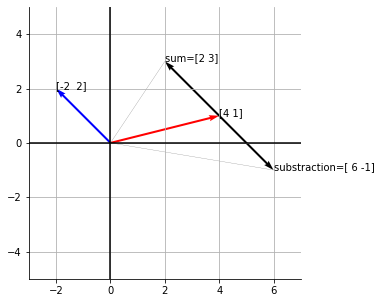

In [35]:
fig, ax = plt.subplots(figsize=(5, 5))
quiver2d(v, 'r')
quiver2d(w, 'b')
quiver2d_op(v, w, 'sum')
quiver2d_op(v, w, 'substraction')
format_plot()
plt.xlim(-3, 7)

## Problem 1.3

If `v+w=[3,1]` and `v-w=[1,3]`, compute and draw v and w.

# Solution:

We have a system of 4 equations:w2 =
`(1) v1 + w1 = 3
(2) v1 - w1 = 1
(3) v2 + w2 = 1
(4) v2 - w2 = 3`

The system can be easily solved using arithmetic. 

From (1) and (2): v1=2 w1=1
From (3) and (4): v2=2 w2=1

Solution:
`v = [2,2]`
`w= [1,-1]`

For demostration purposes, we will use [numpy.linalg.solve](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html)

In [6]:
help(np.linalg.solve)

Help on function solve in module numpy.linalg:

solve(a, b)
    Solve a linear matrix equation, or system of linear scalar equations.
    
    Computes the "exact" solution, `x`, of the well-determined, i.e., full
    rank, linear matrix equation `ax = b`.
    
    Parameters
    ----------
    a : (..., M, M) array_like
        Coefficient matrix.
    b : {(..., M,), (..., M, K)}, array_like
        Ordinate or "dependent variable" values.
    
    Returns
    -------
    x : {(..., M,), (..., M, K)} ndarray
        Solution to the system a x = b.  Returned shape is identical to `b`.
    
    Raises
    ------
    LinAlgError
        If `a` is singular or not square.
    
    Notes
    -----
    
    .. versionadded:: 1.8.0
    
    Broadcasting rules apply, see the `numpy.linalg` documentation for
    details.
    
    The solutions are computed using LAPACK routine ``_gesv``.
    
    `a` must be square and of full-rank, i.e., all rows (or, equivalently,
    columns) must be linearl

In [7]:
a = np.array([[3, 1], [1, 2]])
b = np.array([9, 8])
x = np.linalg.solve(a, b)
x

array([2., 3.])

In [8]:
# First system to solve
# v1 + w1 = 3
# v1 - w1 = 1

a = np.array([[1, 1], [1, -1]])
b = np.array([3, 1])
x = np.linalg.solve(a, b)
x

array([2., 1.])

In [9]:
# Second system to solve
# v2 + w2 = 1
# v2 - w2 = 3

c = np.array([[1, 1], [1, -1]])
d = np.array([1, 3])
y = np.linalg.solve(c, d)
y

array([ 2., -1.])

In [10]:
# solutions v and w
v = np.array([x[0], y[0]])
w = np.array([x[1], y[1]])
print(f'v = {v}')
print(f'w = {w}')

v = [2. 2.]
w = [ 1. -1.]


(-2, 4)

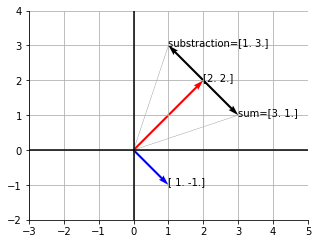

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
quiver2d(v, 'r')
quiver2d(w, 'b')
quiver2d_op(v, w, 'sum')
quiver2d_op(v, w, 'substraction')
format_plot()
plt.xlim(-3, 5)
plt.ylim(-2, 4)